In [1]:
import pandas as pd
import numpy as np
census = pd.read_csv('nyc_census_tracts.csv')
unbanked = pd.read_csv('Where_Are_the_Unbanked_and_Underbanked_in_New_York_City.csv')
us_banks = pd.read_csv('locations.csv')

/var/folders/qj/gh_j11514m37mqtfrlr885k40000gn/T/ipykernel_59967/142554689.py:5: DtypeWarning: Columns (29) have mixed types. Specify dtype option on import or set low_memory=False.
  us_banks = pd.read_csv('locations.csv')


# Adding sub-boro name to census data

In [2]:
bronx = pd.read_csv('bronx.csv')
manhattan = pd.read_csv('manhattan.csv')
staten_island = pd.read_csv('staten_island.csv')
brooklyn = pd.read_csv('brooklyn.csv')
queens = pd.read_csv('queens.csv')

borough_map = { 
    'Bronx': bronx.T,
    'Brooklyn': brooklyn.T, 
    'Manhattan': manhattan.T, 
    'Queens': queens.T, 
    'Staten Island': staten_island.T }

In [3]:
def get_subboro(borough, tract):
    """
    Retrieves subboro by tract from the lookup tables
    """
    df = borough_map[borough]
    print(tract)
    for index, row in df.iterrows():
        if tract in list(row):
            # print(list(row))
            return index.strip()
    raise ValueError(str(tract) + " not found.")

In [4]:
df_aligned = pd.DataFrame(columns=unbanked.columns)
unfound = []
census_subboro_column = []
tracts = []
for tract, borough in zip(census['CensusTract'], census['Borough']):
    tract = int(str(tract)[5:])
    try:
        subboro = get_subboro(borough, tract)
    except Exception as e:
        unfound.append((borough, tract))
        subboro = 'UNFOUND'
    census_subboro_column.append(subboro)
    tracts.append(tract)
    
census['Sub Boro Name'] = census_subboro_column
census['Tract'] = tracts

100
200
400
1600
1900
2000
2300
2400
2500
2701
2702
2800
3100
3300
3500
3700
3800
3900
4001
4100
4200
4300
4400
4600
4800
5001
5002
5100
5200
5300
5400
5600
5902
6000
6100
6200
6300
6400
6500
6700
6800
6900
7000
7100
7200
7300
7400
7500
7600
7700
7800
7900
8300
8400
8500
8600
8700
8900
9000
9200
9300
9600
9800
11000
11502
11700
11800
11900
12101
12102
12300
12500
12701
12901
13000
13100
13200
13300
13500
13800
14100
14300
14400
14500
14701
14702
14900
15100
15200
15300
15500
15700
15800
15900
16000
16100
16200
16300
16400
16500
16600
16700
16900
17100
17300
17500
17701
17702
17901
17902
18101
18102
18301
18302
18400
18500
18900
19300
19400
19500
19700
19900
20000
20100
20200
20400
20501
20502
20601
20900
21001
21002
21100
21200
21301
21302
21501
21502
21601
21602
21700
21800
21900
22000
22101
22102
22200
22300
22401
22403
22404
22500
22701
22702
22703
22800
22901
22902
23000
23100
23200
23301
23302
23501
23502
23600
23702
23703
23704
23800
23900
24000
24100
24300
24400
24501
24502
2460

In [5]:
# NOTE: for unassociated tracts, we will remove
# Therefore, missing about 0.006% of the population!
print('Unfound tracts %: ' + str(census[census['Sub Boro Name'] == 'UNFOUND']['TotalPop'].sum() / census['TotalPop'].sum()))
print(len(census))
census = census[census['Sub Boro Name'] != 'UNFOUND']
print(len(census))

Unfound tracts %: 0.006800017515664118
2167
2138


In [ ]:
census.to_csv('census_with_subboro.csv')

# Analysis with Unbanked

### Question 1: How correlated is unbankedness with race?

In [7]:
race_census = census[['TotalPop', 'Hispanic', 'White', 'Black', 'Native', 'Asian', 'Sub Boro Name','Tract']]

In [11]:
race_census

,TotalPop,Hispanic,White,Black,Native,Asian,Sub Boro Name,Tract
0,7703,29.9,6.1,60.9,0.2,1.6,Mott Haven / Hunts Point,100
1,5403,75.8,2.3,16.0,0.0,4.2,Soundview / Parkchester,200
2,5915,62.7,3.6,30.7,0.0,0.3,Soundview / Parkchester,400
3,5879,65.1,1.6,32.4,0.0,0.0,Soundview / Parkchester,1600
4,2591,55.4,9.0,29.0,0.0,2.1,Mott Haven / Hunts Point,1900
...,...,...,...,...,...,...,...,...
2161,4895,30.7,40.2,11.6,0.0,16.0,North Shore,30301
2162,6279,35.8,28.7,17.6,0.0,14.3,North Shore,30302
2163,2550,27.1,6.2,60.4,0.0,6.3,North Shore,31901
2164,4611,20.9,14.7,61.9,0.0,0.9,North Shore,31902


In [12]:
unbanked_race = unbanked[['Sub Boro Name', 'Unbanked 2013', 'Underbanked 2013', 'Median income 2013', 'Unemployment 2013', '% Poor 2013']]

In [13]:
by_subboro = {}
track_nans = []
for index, row in race_census.iterrows():
    hispanic = row['TotalPop'] * row['Hispanic'] * (1.0/100.0)
    white = row['TotalPop'] * row['White'] * (1.0/100.0)
    black = row['TotalPop'] * row['Black'] * (1.0/100.0)
    native = row['TotalPop'] * row['Native'] * (1.0/100.0)
    asian = row['TotalPop'] * row['Asian'] * (1.0/100.0)
    if np.isnan(np.array([hispanic, white, black, native, asian])).any():
        track_nans.append(row['Sub Boro Name'])
    else:
        if row['Sub Boro Name'] not in by_subboro:
            by_subboro[row['Sub Boro Name']] = {'Hispanic': hispanic, 
                                            'White': white, 
                                            'Black': black, 
                                            'Native': native, 
                                            'Asian': asian}
        else:
            by_subboro[row['Sub Boro Name']]['Hispanic'] += hispanic
            by_subboro[row['Sub Boro Name']]['White'] += white 
            by_subboro[row['Sub Boro Name']]['Black'] += black 
            by_subboro[row['Sub Boro Name']]['Native'] += native
            by_subboro[row['Sub Boro Name']]['Asian'] += asian

census_race_df_subboro = pd.DataFrame({}, columns=['Hispanic', 'White', 'Black', 'Native', 'Asian', 'Sub Boro Name'])
for k, v in by_subboro.items():
    row = {}
    for r in ['Hispanic', 'White', 'Black', 'Native', 'Asian']:
        val = float(v[r]) / float(race_census.groupby(['Sub Boro Name']).sum()['TotalPop'].loc[k])
        row[r] = val
    row['Sub Boro Name'] = k
    census_race_df_subboro = census_race_df_subboro.append(row, ignore_index = True)


/var/folders/qj/gh_j11514m37mqtfrlr885k40000gn/T/ipykernel_59967/307580507.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  census_race_df_subboro = census_race_df_subboro.append(row, ignore_index = True)
/var/folders/qj/gh_j11514m37mqtfrlr885k40000gn/T/ipykernel_59967/307580507.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  census_race_df_subboro = census_race_df_subboro.append(row, ignore_index = True)
/var/folders/qj/gh_j11514m37mqtfrlr885k40000gn/T/ipykernel_59967/307580507.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  census_race_df_subboro = census_race_df_subboro.append(row, ignore_index = True)
/var/folders/qj/gh_j11514m37mqtfrlr885k40000gn/T/ipykernel_59967/307580507.py:32: FutureWarning: The frame

In [14]:
census_race_df_subboro = census_race_df_subboro.merge(unbanked_race, how='inner', on='Sub Boro Name')
census_race_df_subboro.columns = [c.replace(' ', '_') for c in census_race_df_subboro.columns]
# Add aggregate column of unbanked vs. underbanked
census_race_df_subboro['Aggregate_Banking'] = census_race_df_subboro['Unbanked_2013'] + census_race_df_subboro['Underbanked_2013']

In [15]:
# census_race_df_subboro['Tract'] = race_census['Tract']

In [16]:
# census_race_df_subboro
census_race_df_subboro = census_race_df_subboro.rename({'%_Poor_2013':'Percent_Poor_2013'}, axis=1)
census_race_df_subboro

,Hispanic,White,Black,Native,Asian,Sub_Boro_Name,Unbanked_2013,Underbanked_2013,Median_income_2013,Unemployment_2013,Percent_Poor_2013,Aggregate_Banking
0,0.685007,0.016946,0.279119,0.002544,0.008180,Mott Haven / Hunts Point,0.31,0.30,23083,0.12,0.40,0.61
1,0.579638,0.028504,0.294561,0.001569,0.068948,Soundview / Parkchester,0.22,0.29,32363,0.17,0.28,0.51
2,0.688496,0.014521,0.270150,0.001263,0.015460,University Heights / Fordham,0.30,0.33,24261,0.16,0.39,0.63
3,0.631895,0.016260,0.317884,0.005016,0.015933,Highbridge / S. Concourse,0.26,0.34,26387,0.15,0.34,0.60
4,0.635721,0.046448,0.296285,0.002456,0.007544,Morrisania / East Tremont,0.28,0.31,24259,0.18,0.39,0.59
5,0.361729,0.315302,0.272254,0.002367,0.030157,Throgs Neck / Co-op City,0.10,0.27,56059,0.09,0.08,0.37
6,0.449122,0.227821,0.222382,0.000258,0.080579,Pelham Parkway,0.15,0.28,43075,0.13,0.17,0.43
7,0.672237,0.078020,0.162238,0.001881,0.065865,Kingsbridge Heights / Mosholu,0.24,0.31,29069,0.18,0.34,0.55
8,0.456937,0.339737,0.129162,0.002283,0.051895,Riverdale / Kingsbridge,0.11,0.26,60614,0.12,0.12,0.37
9,0.227401,0.074226,0.653739,0.002756,0.022297,Williamsbridge / Baychester,0.16,0.35,45633,0.14,0.19,0.51


In [17]:
from statsmodels.regression.linear_model import WLS

def wls_model(df, form, name):
    model = WLS.from_formula(
        form,
        data=df,
        #freq_weights=np.array(self.WEIGHTS.array)
    )
    regression = model.fit(method='pinv')
    return regression.summary2()
        
# Unbanked by race
wls_model(
    census_race_df_subboro,
    'Unbanked_2013 ~ Hispanic + White + Black + Asian + Unemployment_2013 + Percent_Poor_2013', # C(sex, Treatment(reference="Male")) + C(race, Treatment(reference="White"))
    'unbanked_by_race'
)

<class 'statsmodels.iolib.summary2.Summary'>
"""
                  Results: Weighted least squares
===================================================================
Model:              WLS              Adj. R-squared:     0.953     
Dependent Variable: Unbanked_2013    AIC:                -288.4876 
Date:               2022-12-19 20:05 BIC:                -274.4362 
No. Observations:   55               Log-Likelihood:     151.24    
Df Model:           6                F-statistic:        182.2     
Df Residuals:       48               Prob (F-statistic): 2.81e-31  
R-squared:          0.958            Scale:              0.00027424
-------------------------------------------------------------------
                      Coef.  Std.Err.    t    P>|t|   [0.025 0.975]
-------------------------------------------------------------------
Intercept            -0.1918   0.1090 -1.7593 0.0849 -0.4111 0.0274
Hispanic              0.3310   0.1117  2.9627 0.0047  0.1064 0.5556
White                 0.1996   0.1103  1.8102 0.0765 -0.0221 0.4213
Black                 0.2998   0.1117  2.6831 0.0100  0.0751 0.5245
Asian                 0.1076   0.1173  0.9168 0.3638 -0.1283 0.3435
Unemployment_2013     0.0370   0.1089  0.3398 0.7355 -0.1820 0.2560
Percent_Poor_2013     0.3884   0.0390  9.9650 0.0000  0.3100 0.4668
-------------------------------------------------------------------
Omnibus:               1.731         Durbin-Watson:           1.972
Prob(Omnibus):         0.421         Jarque-Bera (JB):        1.088
Skew:                  -0.326        Prob(JB):                0.580
Kurtosis:              3.225         Condition No.:           129  
===================================================================

"""

In [20]:
# Underbanked by race
summary = wls_model(
    census_race_df_subboro,
    'Underbanked_2013 ~ Hispanic + White + Black + Asian + Unemployment_2013 + Percent_Poor_2013',
    'unbanked_by_race'
)

In [21]:
# Aggregate by race
summary = wls_model(
    census_race_df_subboro,
    'Aggregate_Banking ~ Hispanic + White + Black + Asian + Unemployment_2013 + Percent_Poor_2013',
    'unbanked_by_race'
)

In [50]:
summary

<class 'statsmodels.iolib.summary2.Summary'>
"""
                  Results: Weighted least squares
====================================================================
Model:              WLS               Adj. R-squared:     0.967     
Dependent Variable: Aggregate_Banking AIC:                -251.4837 
Date:               2022-12-19 20:15  BIC:                -237.4323 
No. Observations:   55                Log-Likelihood:     132.74    
Df Model:           6                 F-statistic:        263.5     
Df Residuals:       48                Prob (F-statistic): 5.64e-35  
R-squared:          0.971             Scale:              0.00053743
--------------------------------------------------------------------
                       Coef.  Std.Err.    t    P>|t|   [0.025 0.975]
--------------------------------------------------------------------
Intercept             -0.1367   0.1526 -0.8954 0.3750 -0.4436 0.1702
Hispanic               0.6022   0.1564  3.8504 0.0003  0.2877 0.9167
White                  0.3013   0.1544  1.9517 0.0568 -0.0091 0.6117
Black                  0.6303   0.1564  4.0292 0.0002  0.3158 0.9449
Asian                  0.2451   0.1642  1.4925 0.1421 -0.0851 0.5754
Unemployment_2013      0.1478   0.1525  0.9695 0.3372 -0.1587 0.4544
Percent_Poor_2013      0.3070   0.0546  5.6265 0.0000  0.1973 0.4167
--------------------------------------------------------------------
Omnibus:                0.089         Durbin-Watson:           2.007
Prob(Omnibus):          0.956         Jarque-Bera (JB):        0.255
Skew:                   -0.072        Prob(JB):                0.880
Kurtosis:               2.699         Condition No.:           129  
====================================================================

"""

In [28]:
def predominantly(row):
    _max = -1.0
    race = ''
    for col in ['Hispanic', 'White', 'Black', 'Native','Asian']:
        if row[col] > _max:
            race = col
            _max = row[col]
    return race

census_race_df_subboro['predominantly'] = census_race_df_subboro.apply(lambda row: predominantly(row), axis=1)

In [33]:
df_predominantly = census_race_df_subboro.groupby('predominantly').mean()

/var/folders/qj/gh_j11514m37mqtfrlr885k40000gn/T/ipykernel_59967/2054987319.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_predominantly = census_race_df_subboro.groupby('predominantly').mean()


In [48]:
df_plot = df_predominantly.reset_index()
df_plot = df_plot[['predominantly', 'Unemployment_2013', 'Percent_Poor_2013','Unbanked_2013', 'Underbanked_2013']] # 'Aggregate_Banking']]

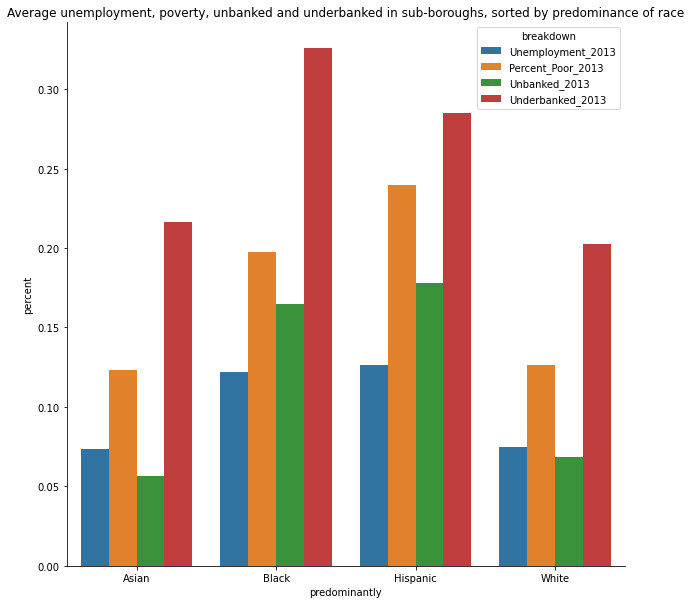

In [51]:
import seaborn as sns
import matplotlib.pyplot as plt 
fig, ax1 = plt.subplots(figsize=(10, 10))
tidy = df_plot.melt(id_vars='predominantly', value_name='percent', var_name='breakdown')
sns.barplot(x='predominantly', y='percent', hue='breakdown', data=tidy, ax=ax1)
plt.title('Average unemployment, poverty, unbanked and underbanked in sub-boroughs, sorted by predominance of race')
sns.despine(fig)

## Controlling for any commercial banking

In [26]:
len(us_banks[us_banks['COUNTY'].isin(['Bronx', 'Kings', 'New York', 'Queens', 'Richmond'])])

1571

In [27]:
nyc_banks = us_banks[us_banks['COUNTY'].isin(['Bronx', 'Kings', 'New York', 'Queens', 'Richmond'])]

In [28]:
def format(address, city, zip):
    address = address.replace(" ", "+")
    city = city.replace(" ", "+")
    return address + '%2C+' + city + '%2C+NY%2C+' + str(zip)

def format_row_address(row):
    return format(row['ADDRESS'],row['CITY'],row['ZIP'])

def format_normal_address(row):
    return row['ADDRESS'] + ', ' + row['CITY'] + ', NY, ' + str(row['ZIP'])

formatted_rows_column = nyc_banks.apply(lambda x: format_row_address(x), axis=1)
formatted_rows_normal = nyc_banks.apply(lambda x: format_normal_address(x), axis=1)

In [29]:
formatted_rows_normal.iloc[30]

'31-81 Steinway Street, Astoria, NY, 11103'

In [49]:
nyc_banks['formatted_address'] = formatted_rows_normal

/var/folders/qj/gh_j11514m37mqtfrlr885k40000gn/T/ipykernel_47248/4134371361.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nyc_banks['formatted_address'] = formatted_rows_normal


In [51]:
import requests

# location given here
address = formatted_rows_normal.iloc[30]

def lookup_tract(address):
    # api-endpoint
    URL = "https://geocoding.geo.census.gov/geocoder/geographies/onelineaddress?"
    
    # defining a params dict for the parameters to be sent to the API
    PARAMS = {'address': address,
            'benchmark':'2020',
            'vintage':'2010',
            'format':'json'}
    
    # sending get request and saving the response as response object
    r = requests.get(url = URL, params = PARAMS)
    
    # extracting data in json format
    data = r.json()

    # return tract
    try:
        return data['result']['addressMatches'][0]['geographies']['Census Tracts'][0]['TRACT'],data['result']['addressMatches'][0]['geographies']['County Subdivisions'][0]['BASENAME']
    except:
        return '-1','-1'

In [52]:
def associate_tract_with_address(row):
    return lookup_tract(row['formatted_address'])

tracts = nyc_banks.apply(lambda x: associate_tract_with_address(x), axis=1)

In [53]:
nyc_banks['tract'] = tracts

/var/folders/qj/gh_j11514m37mqtfrlr885k40000gn/T/ipykernel_47248/110791871.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nyc_banks['tract'] = tracts


In [74]:
nyc_banks.to_csv('nyc_banks_subboro.csv')